Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [3]:
import pandas as pd

In [6]:
user_data = pd.read_csv('3_user_data.csv', encoding='windows-1251', sep=',')

In [7]:
logs = pd.read_csv('3_logs.csv', encoding='windows-1251', sep=',')

In [8]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [9]:
user_data.shape

(2954, 3)

In [10]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [11]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [12]:
logs.shape

(4500, 4)

In [13]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [14]:
logs.platform.nunique()

3

# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [17]:
logs.query('success == True') \
    .platform.value_counts() \
    .idxmax()

'phone'

# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [19]:
max_value = logs \
                .query('success == True') \
                .client \
                .value_counts() \
                .max()

logs.query('success == True')\
    .groupby(['client'], as_index = False)\
    .agg({'success': 'count'})\
    .query('success == @max_value')

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [20]:
full_data = user_data.merge(logs, on='client')
full_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [26]:
full_data.query('premium == True')\
         .groupby(['platform'], as_index = False)\
         .agg({'success': 'count'})\
         .sort_values('success', ascending=False)\
         .head(1)

,platform,success
1,phone,246


# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

In [35]:
import seaborn as sns

In [36]:
import matplotlib.pyplot as plt

In [37]:
premium_clients = user_data.query('premium == True')
premium_logs = premium_clients.merge(logs, on='client')

In [38]:
non_premium_clients = user_data.query('premium == False')
non_premium_logs = non_premium_clients.merge(logs, on='client')

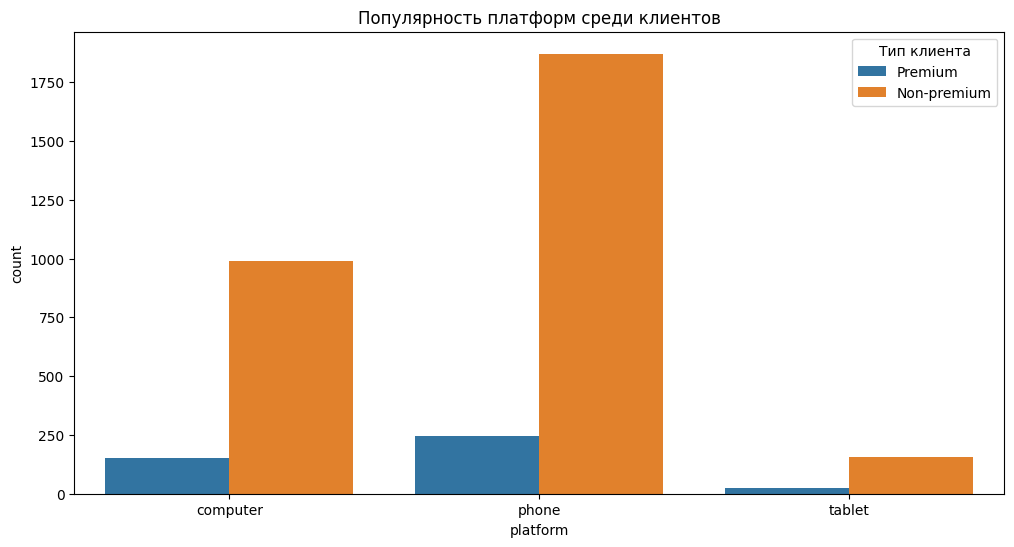

In [39]:

premium_logs['client_type'] = 'Premium'
non_premium_logs['client_type'] = 'Non-premium'
combined_logs = pd.concat([premium_logs, non_premium_logs])


plt.figure(figsize=(12, 6))
sns.countplot(x='platform', hue='client_type', data=combined_logs)
plt.title('Популярность платформ среди клиентов')
plt.legend(title='Тип клиента')
plt.show()

# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

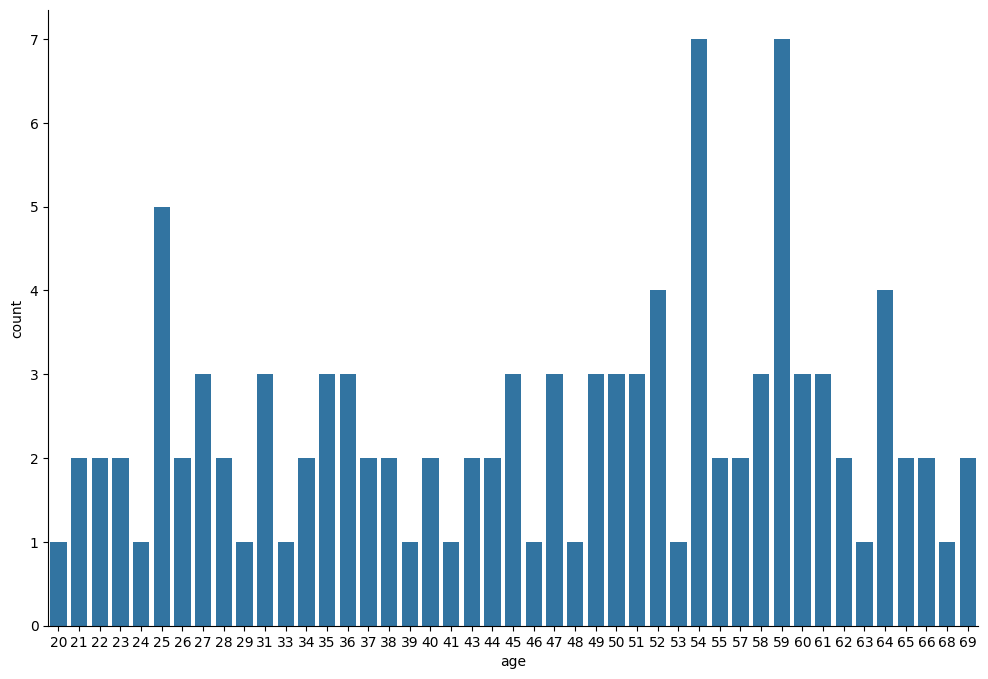

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer')&(premium_logs.success == True)],x='age')
sns.despine()